## 10.3. 1日データの可視化

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.notebook_repr_html', False)

act = pd.read_csv('OTg6QzA_activities.csv')
act.shape #データの構造、行列のサイズ

(66281, 4)

In [42]:
# 2022年1月1日のデータだけを抽出し、可視化してみましょう。
# ディープコピー（深いコピー）を行います。
# シャローコピー（浅いコピー）では、コピー版が変更されると元のデータも一緒に変更されます。
# 逆に、ディープコピーは新しいコピー版を作るので、コピー版を変更しても元のデータには何も変更が発生しません。

data220101 = act[ (act['timestamp'] >= '2022-01-01 00:00:00.000') &
                 (act['timestamp'] < '2022-01-02 00:00:00.000') ].copy()

data220101['p_timestamp'] = data220101.timestamp.shift(1)
data220101['p_x'] = data220101['X'].shift(1)
data220101['p_y'] = data220101['Y'].shift(1)
data220101['p_z'] = data220101['Z'].shift(1)
data220101.head(5)

                 timestamp   X   Y   Z              p_timestamp   p_x   p_y  \
0  2022-01-01 00:01:40.363  33  76  56                     None   NaN   NaN   
1  2022-01-01 00:01:42.961  34  87  56  2022-01-01 00:01:40.363  33.0  76.0   
2  2022-01-01 00:01:45.562  25  89  47  2022-01-01 00:01:42.961  34.0  87.0   
3  2022-01-01 00:01:48.163  11  70  50  2022-01-01 00:01:45.562  25.0  89.0   
4  2022-01-01 00:02:08.864  33  72  58  2022-01-01 00:01:48.163  11.0  70.0   

    p_z  
0   NaN  
1  56.0  
2  56.0  
3  47.0  
4  50.0  

In [43]:
# NaN値がある行を削除する。
cleaned = data220101.dropna()
cleaned.head(5)

                 timestamp   X   Y   Z              p_timestamp   p_x   p_y  \
1  2022-01-01 00:01:42.961  34  87  56  2022-01-01 00:01:40.363  33.0  76.0   
2  2022-01-01 00:01:45.562  25  89  47  2022-01-01 00:01:42.961  34.0  87.0   
3  2022-01-01 00:01:48.163  11  70  50  2022-01-01 00:01:45.562  25.0  89.0   
4  2022-01-01 00:02:08.864  33  72  58  2022-01-01 00:01:48.163  11.0  70.0   
5  2022-01-01 00:02:21.765  21  68  58  2022-01-01 00:02:08.864  33.0  72.0   

    p_z  
1  56.0  
2  56.0  
3  47.0  
4  50.0  
5  58.0  

In [44]:
cleaned.dtypes

timestamp       object
X                int64
Y                int64
Z                int64
p_timestamp     object
p_x            float64
p_y            float64
p_z            float64
dtype: object

In [45]:
# 距離計算
def calc_dist(df):
  x_d = df['X'] - df['p_x']
  y_d = df['Y'] - df['p_y']
  z_d = df['Z'] - df['p_z']
  return np.sqrt(x_d**2 + y_d**2 + z_d**2)

cleaned['dist'] = cleaned[["X","p_x", "Y", "p_y", "Z", "p_z"]].apply(
                          calc_dist, axis=1)
cleaned.head(5)

C:\Users\sunin\AppData\Local\Temp\ipykernel_35916\3670143498.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned['dist'] = cleaned[["X","p_x", "Y", "p_y", "Z", "p_z"]].apply(


                 timestamp   X   Y   Z              p_timestamp   p_x   p_y  \
1  2022-01-01 00:01:42.961  34  87  56  2022-01-01 00:01:40.363  33.0  76.0   
2  2022-01-01 00:01:45.562  25  89  47  2022-01-01 00:01:42.961  34.0  87.0   
3  2022-01-01 00:01:48.163  11  70  50  2022-01-01 00:01:45.562  25.0  89.0   
4  2022-01-01 00:02:08.864  33  72  58  2022-01-01 00:01:48.163  11.0  70.0   
5  2022-01-01 00:02:21.765  21  68  58  2022-01-01 00:02:08.864  33.0  72.0   

    p_z       dist  
1  56.0  11.045361  
2  56.0  12.884099  
3  47.0  23.790755  
4  50.0  23.494680  
5  58.0  12.649111  

In [46]:
# 時間差分を求めた後、d_time列に保存します。
from datetime import datetime

# 時間差分を求めるPython関数
def calc_timediff(df):
  d1 = datetime.strptime(str(df['timestamp']),
                         "%Y-%m-%d %H:%M:%S.%f")
  d2 = datetime.strptime(str(df['p_timestamp']),
                         "%Y-%m-%d %H:%M:%S.%f")
  return (d1 - d2).total_seconds()

cleaned['d_time'] = cleaned[["timestamp", "p_timestamp"]].apply(calc_timediff, axis=1)
cleaned.head(5)

C:\Users\sunin\AppData\Local\Temp\ipykernel_35916\4046662499.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned['d_time'] = cleaned[["timestamp", "p_timestamp"]].apply(calc_timediff, axis=1)


                 timestamp   X   Y   Z              p_timestamp   p_x   p_y  \
1  2022-01-01 00:01:42.961  34  87  56  2022-01-01 00:01:40.363  33.0  76.0   
2  2022-01-01 00:01:45.562  25  89  47  2022-01-01 00:01:42.961  34.0  87.0   
3  2022-01-01 00:01:48.163  11  70  50  2022-01-01 00:01:45.562  25.0  89.0   
4  2022-01-01 00:02:08.864  33  72  58  2022-01-01 00:01:48.163  11.0  70.0   
5  2022-01-01 00:02:21.765  21  68  58  2022-01-01 00:02:08.864  33.0  72.0   

    p_z       dist  d_time  
1  56.0  11.045361   2.598  
2  56.0  12.884099   2.601  
3  47.0  23.790755   2.601  
4  50.0  23.494680  20.701  
5  58.0  12.649111  12.901  

In [47]:
# 速度を求めてから、calc_act列に保存する。
def calc_act(df):
  if df['d_time'] != 0:
    return np.abs(df['dist'] / df['d_time'])
  else:
    # 正常な数値ではない。
    return 0

cleaned['calc_act'] = cleaned[["dist", "d_time"]].apply(
                             calc_act, axis=1)
cleaned.head(5)

C:\Users\sunin\AppData\Local\Temp\ipykernel_35916\4224175527.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned['calc_act'] = cleaned[["dist", "d_time"]].apply(


                 timestamp   X   Y   Z              p_timestamp   p_x   p_y  \
1  2022-01-01 00:01:42.961  34  87  56  2022-01-01 00:01:40.363  33.0  76.0   
2  2022-01-01 00:01:45.562  25  89  47  2022-01-01 00:01:42.961  34.0  87.0   
3  2022-01-01 00:01:48.163  11  70  50  2022-01-01 00:01:45.562  25.0  89.0   
4  2022-01-01 00:02:08.864  33  72  58  2022-01-01 00:01:48.163  11.0  70.0   
5  2022-01-01 00:02:21.765  21  68  58  2022-01-01 00:02:08.864  33.0  72.0   

    p_z       dist  d_time  calc_act  
1  56.0  11.045361   2.598  4.251486  
2  56.0  12.884099   2.601  4.953517  
3  47.0  23.790755   2.601  9.146772  
4  50.0  23.494680  20.701  1.134954  
5  58.0  12.649111  12.901  0.980475  

In [48]:
# timestampをdatetimeデータタイプに変更する
cleaned['timestamp'] = cleaned['timestamp'].astype('datetime64[ns]')

C:\Users\sunin\AppData\Local\Temp\ipykernel_35916\2510531693.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned['timestamp'] = cleaned['timestamp'].astype('datetime64[ns]')


In [49]:
# 必要な列だけ抽出する。
cleaned = cleaned[['timestamp', 'calc_act']]
cleaned

                   timestamp   calc_act
1    2022-01-01 00:01:42.961   4.251486
2    2022-01-01 00:01:45.562   4.953517
3    2022-01-01 00:01:48.163   9.146772
4    2022-01-01 00:02:08.864   1.134954
5    2022-01-01 00:02:21.765   0.980475
...                      ...        ...
1257 2022-01-01 23:48:54.680   1.262926
1258 2022-01-01 23:48:57.273  24.693884
1259 2022-01-01 23:49:20.376   0.621248
1260 2022-01-01 23:49:25.476  13.362137
1261 2022-01-01 23:49:48.684   2.683281

[1261 rows x 2 columns]

In [50]:
cleaned = cleaned.set_index('timestamp')
cleaned

                          calc_act
timestamp                         
2022-01-01 00:01:42.961   4.251486
2022-01-01 00:01:45.562   4.953517
2022-01-01 00:01:48.163   9.146772
2022-01-01 00:02:08.864   1.134954
2022-01-01 00:02:21.765   0.980475
...                            ...
2022-01-01 23:48:54.680   1.262926
2022-01-01 23:48:57.273  24.693884
2022-01-01 23:49:20.376   0.621248
2022-01-01 23:49:25.476  13.362137
2022-01-01 23:49:48.684   2.683281

[1261 rows x 1 columns]

In [51]:
# 10分ごとに速度の平均値、最小値、最大値を計算し、その結果を視覚化
tenmin = cleaned.resample('10min')
result = tenmin['calc_act'].agg(['mean', 'min', 'max'])
result

                         mean       min        max
timestamp                                         
2022-01-01 00:00:00  2.359774  0.205775   9.146772
2022-01-01 00:10:00  3.804910  0.011198  12.985407
2022-01-01 00:20:00  1.204413  0.176624   3.200697
2022-01-01 00:30:00  0.065608  0.065608   0.065608
2022-01-01 00:40:00       NaN       NaN        NaN
...                       ...       ...        ...
2022-01-01 23:00:00  4.334201  0.210261  28.526284
2022-01-01 23:10:00  4.610322  0.038909  16.299708
2022-01-01 23:20:00  1.577668  0.157481   5.650899
2022-01-01 23:30:00  7.753006  0.047096  36.495127
2022-01-01 23:40:00  7.176995  0.132364  37.738044

[143 rows x 3 columns]

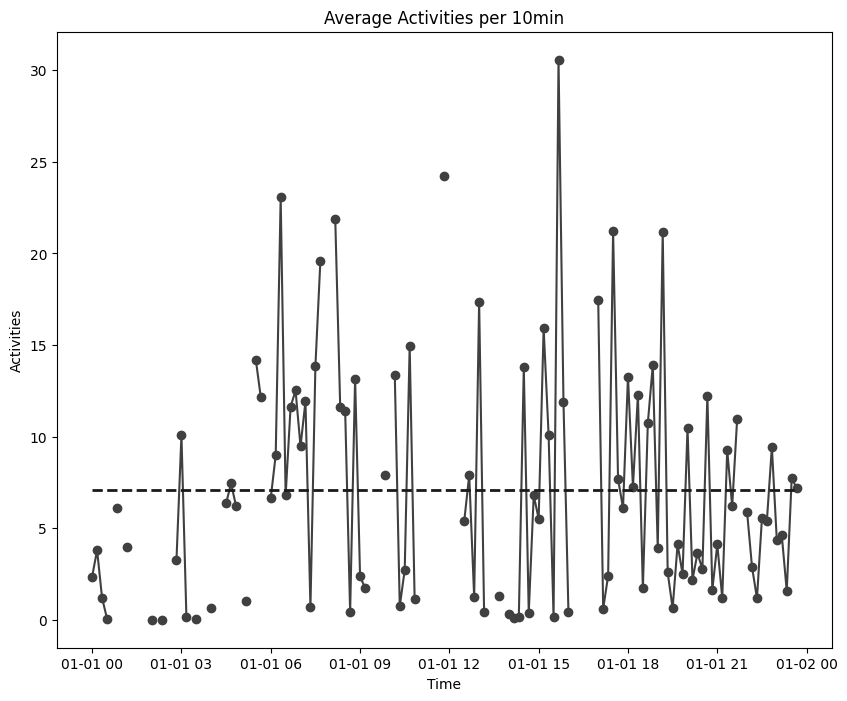

In [52]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(1,1,1)

plt.plot(result['mean'], c='0.25', marker='o')

# 活動の平均線
plt.hlines(result['mean'].mean(),  min(result.index), max(result.index),
           color='0.1', linestyle='--', linewidth=2)

plt.title("Average Activities per 10min")
plt.xlabel("Time")
plt.ylabel("Activities")

plt.show()

In [53]:
result.head(10)

                         mean       min        max
timestamp                                         
2022-01-01 00:00:00  2.359774  0.205775   9.146772
2022-01-01 00:10:00  3.804910  0.011198  12.985407
2022-01-01 00:20:00  1.204413  0.176624   3.200697
2022-01-01 00:30:00  0.065608  0.065608   0.065608
2022-01-01 00:40:00       NaN       NaN        NaN
2022-01-01 00:50:00  6.089196  0.070434  14.338601
2022-01-01 01:00:00       NaN       NaN        NaN
2022-01-01 01:10:00  3.948859  0.013024   7.813303
2022-01-01 01:20:00       NaN       NaN        NaN
2022-01-01 01:30:00       NaN       NaN        NaN

### 10.3.1. データのクレンジングと視覚化

In [54]:
tenmin2 = cleaned.resample('10min')
result2 = tenmin2['calc_act'].agg(['mean', 'min', 'max'])
result2

                         mean       min        max
timestamp                                         
2022-01-01 00:00:00  2.359774  0.205775   9.146772
2022-01-01 00:10:00  3.804910  0.011198  12.985407
2022-01-01 00:20:00  1.204413  0.176624   3.200697
2022-01-01 00:30:00  0.065608  0.065608   0.065608
2022-01-01 00:40:00       NaN       NaN        NaN
...                       ...       ...        ...
2022-01-01 23:00:00  4.334201  0.210261  28.526284
2022-01-01 23:10:00  4.610322  0.038909  16.299708
2022-01-01 23:20:00  1.577668  0.157481   5.650899
2022-01-01 23:30:00  7.753006  0.047096  36.495127
2022-01-01 23:40:00  7.176995  0.132364  37.738044

[143 rows x 3 columns]

In [55]:
result2.fillna(0, inplace=True)
result2.head(10)

                         mean       min        max
timestamp                                         
2022-01-01 00:00:00  2.359774  0.205775   9.146772
2022-01-01 00:10:00  3.804910  0.011198  12.985407
2022-01-01 00:20:00  1.204413  0.176624   3.200697
2022-01-01 00:30:00  0.065608  0.065608   0.065608
2022-01-01 00:40:00  0.000000  0.000000   0.000000
2022-01-01 00:50:00  6.089196  0.070434  14.338601
2022-01-01 01:00:00  0.000000  0.000000   0.000000
2022-01-01 01:10:00  3.948859  0.013024   7.813303
2022-01-01 01:20:00  0.000000  0.000000   0.000000
2022-01-01 01:30:00  0.000000  0.000000   0.000000

In [56]:
# クレンジングされたデータの平均値の平均
result2['mean'].mean()

5.1162063544499095

In [57]:
# 以前平均値の平均
result['mean'].mean()

7.103082608605214

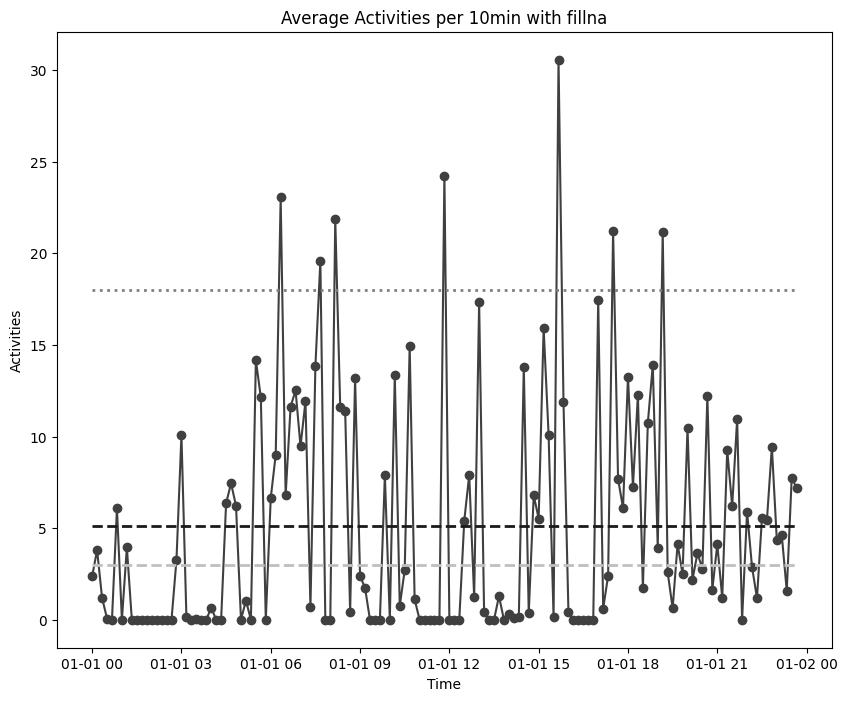

In [58]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(1,1,1)

plt.plot(result2['mean'], c='0.25', marker='o')

# 活動平均線
plt.hlines(result2['mean'].mean(), min(result2.index),
           max(result2.index), color='0.1', linestyle='--', linewidth=2)

# 平均速度が1秒あたり18cm/sec以上であれば、上半身が動いたと見なします。
ax.hlines(18, min(result2.index), max(result2.index),
          color='0.5', linestyle=':', linewidth=2)

# 平均速度が1秒あたり5cm/sec以下であれば、ほとんど動きがないと見なします。
ax.hlines(3, min(result2.index), max(result2.index),
          color='0.75', linestyle='--', linewidth=2)

plt.title("Average Activities per 10min with fillna")
plt.xlabel("Time")
plt.ylabel("Activities")

plt.show()

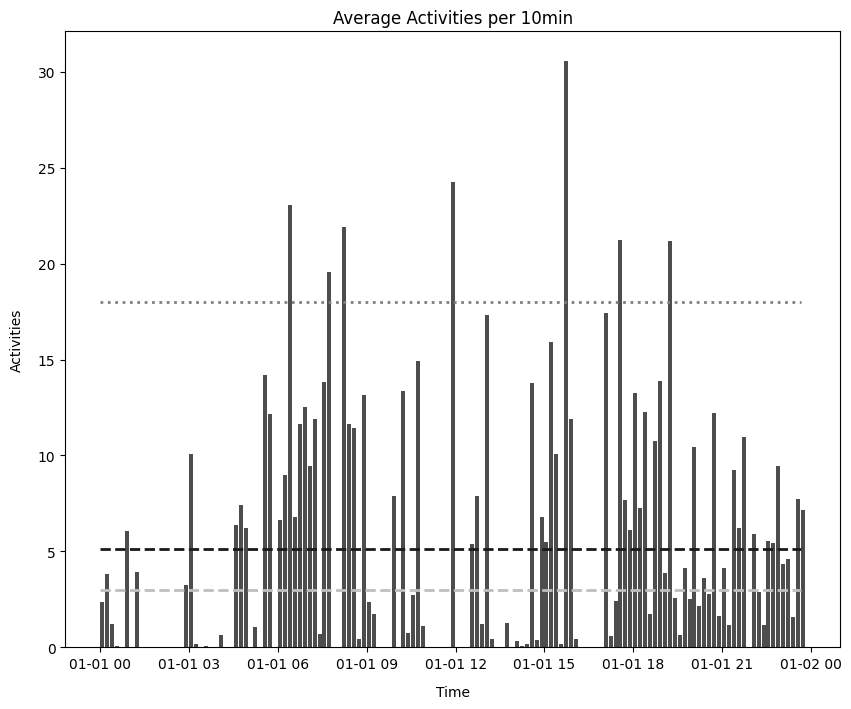

In [59]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(1,1,1)

# 棒グラフを描く
ax.bar(result2.index, result2['mean'], width=0.8/len(result2),
       align='edge', color='0.3')

# 全体の平均
ax.hlines(result2['mean'].mean(),  min(result2.index),
          max(result2.index), color='0.1', linestyle='--', linewidth=2)

# 平均速度が1秒あたり18cm/sec以上であれば、上半身が動いたと見なします。
ax.hlines(18,  min(result2.index), max(result2.index),
          color='0.5', linestyle=':', linewidth=2)

# 平均速度が1秒あたり5cm/sec以下であれば、ほとんど動きがないと見なします。
ax.hlines(3,  min(result2.index), max(result2.index),
          color='0.75', linestyle='--', linewidth=2)

# X, Y軸のラベル
plt.title("Average Activities per 10min")
plt.xlabel('Time', labelpad=10)
plt.ylabel('Activities', labelpad=10)

plt.show()